## 🔮💿 PRÉDIRE LES CERTIFICATIONS DES ALBUMS ET SINGLES

## Importation des modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ouverture des données

In [2]:
music_model = pd.read_csv('/Users/anissa/P8/music_model.csv')

## MODÉLISATION

https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

### Gradient Descent based algorithms

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

In [4]:
# Variables explicatives
X = music_model[['acousticness', 'danceability', 'duration_min', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'end_of_fade_in',
       'start_of_fade_out', 'encoding_genre', 'encoding_followers','encoding_artist_popu']]

# Variable à expliquer
y = music_model.is_certified_single

***Feature scaling : Standardization***

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

In [7]:
# Partition aléatoire du jeu de données en 80% pour créer le modèle, 20% pour tester le modèle
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.20)

#### Regression logitique

In [8]:
# Régression logistique
model = LogisticRegression()
model.fit(X_train_std, y_train_std)

LogisticRegression()

In [9]:
# Stockage de prédictions
predictions = model.predict(X_test_std)

In [10]:
print('Training accuracy {:.4f}'.format(model.score(X_train_std,y_train_std)))
print('Testing accuracy {:.4f}'.format(model.score(X_test_std,y_test_std)))

Training accuracy 0.8029
Testing accuracy 0.7220


The confusion matrix is: 
 [[ 97  42]
 [ 35 103]]
The auc score is:  0.722
The accuracy score is:  0.722
The recall score is:  0.746
The precision score is:  0.71
F1 score is:  0.728


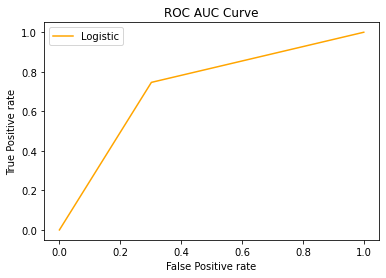

In [11]:
# Metrics for predictions
confusion_matrix1 = confusion_matrix(y_test_std,predictions)
print("The confusion matrix is: \n", confusion_matrix1)
fpr,tpr,thresholds = roc_curve(y_test_std,predictions)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc1 = roc_auc_score(y_test_std,predictions)
print("The auc score is: ",roc_auc1.round(3))

accuracy1 = accuracy_score(y_test_std,predictions)
print("The accuracy score is: ", accuracy1.round(3))

recall1 = recall_score(y_test_std,predictions)
print("The recall score is: ", recall1.round(3))

precision1 = precision_score(y_test_std,predictions)
print("The precision score is: ", precision1.round(3))

f1_score1 = f1_score(y_test_std,predictions)
print("F1 score is: ", f1_score1.round(3))

### Distance-based algorithms

#### Linear SVC

In [12]:
from sklearn import svm

In [13]:
from sklearn.svm import NuSVC

model2 = NuSVC(nu=0.6, probability=True, gamma = 'scale').fit(X_train_std, y_train_std)
predictions2 = model2.predict(X_test_std)

The confusion matrix is: 
 [[ 99  40]
 [ 32 106]]
The auc score is:  0.74
The accuracy score is:  0.74
The recall score is:  0.768
The precision score is:  0.726
F1 score is:  0.746


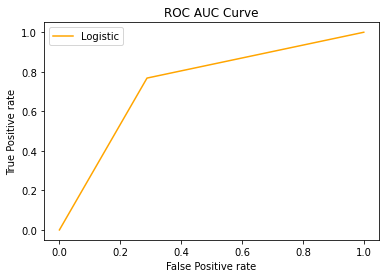

In [14]:
confusion_matrix2 = confusion_matrix(y_test_std,predictions2)
print("The confusion matrix is: \n", confusion_matrix2)
fpr,tpr,thresholds = roc_curve(y_test_std,predictions2)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc2 = roc_auc_score(y_test_std,predictions2)
print("The auc score is: ",roc_auc2.round(3))

accuracy2 = accuracy_score(y_test_std,predictions2)
print("The accuracy score is: ", accuracy2.round(3))

recall2 = recall_score(y_test_std,predictions2)
print("The recall score is: ", recall2.round(3))

precision2 = precision_score(y_test_std,predictions2)
print("The precision score is: ", precision2.round(3))

f1_score2 = f1_score(y_test_std,predictions2)
print("F1 score is: ", f1_score2.round(3))

##### + Build SVM Model with Hyperparameter : GridSearchCV

In [15]:
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_std, y_train_std)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [18]:
predictions3 = grid.predict(X_test_std)
 
# print classification report
print(classification_report(y_test_std, predictions3))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       139
           1       0.78      0.79      0.79       138

    accuracy                           0.79       277
   macro avg       0.79      0.79      0.79       277
weighted avg       0.79      0.79      0.79       277



In [19]:
print(precision_score(y_test_std, predictions3))

0.7841726618705036


The confusion matrix is: 
 [[109  30]
 [ 29 109]]
The auc score is:  0.787
The accuracy score is:  0.787
The recall score is:  0.79
The precision score is:  0.784
F1 score is:  0.787


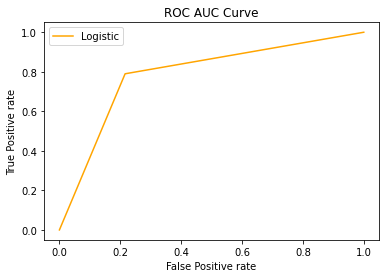

In [20]:
confusion_matrix3 = confusion_matrix(y_test_std,predictions3)
print("The confusion matrix is: \n", confusion_matrix3)
fpr,tpr,thresholds = roc_curve(y_test_std,predictions3)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc3 = roc_auc_score(y_test_std,predictions3)
print("The auc score is: ",roc_auc3.round(3))

accuracy3 = accuracy_score(y_test_std,predictions3)
print("The accuracy score is: ", accuracy3.round(3))

recall3 = recall_score(y_test_std,predictions3)
print("The recall score is: ", recall3.round(3))

precision3 = precision_score(y_test_std,predictions3)
print("The precision score is: ", precision3.round(3))

f1_score3 = f1_score(y_test_std,predictions3)
print("F1 score is: ", f1_score3.round(3))

### kNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors=99,weights='distance').fit(X_train_std, y_train_std)
prediction4 = model4.predict(X_test_std)

In [22]:
print('Training accuracy {:.4f}'.format(model4.score(X_train_std,y_train_std)))
print('Testing accuracy {:.4f}'.format(model4.score(X_test_std,y_test_std)))

Training accuracy 0.9991
Testing accuracy 0.7726


The confusion matrix is: 
 [[114  25]
 [ 38 100]]
The auc score is:  0.772
The accuracy score is:  0.773
The recall score is:  0.725
The precision score is:  0.8
F1 score is:  0.76


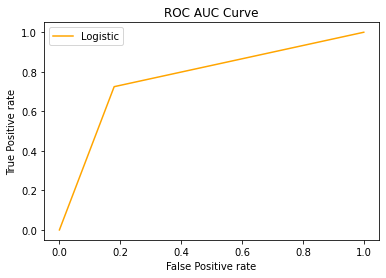

In [23]:
# Metrics for Model 4

confusion_matrix4 = confusion_matrix(y_test_std,prediction4)
print("The confusion matrix is: \n", confusion_matrix4)
fpr,tpr,thresholds = roc_curve(y_test_std,prediction4)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend( )

roc_auc4 = roc_auc_score(y_test_std,prediction4)
print("The auc score is: ",roc_auc4.round(3))

accuracy4 = accuracy_score(y_test_std,prediction4)
print("The accuracy score is: ", accuracy4.round(3))

recall4 = recall_score(y_test_std,prediction4)
print("The recall score is: ", recall4.round(3))

precision4 = precision_score(y_test_std,prediction4)
print("The precision score is: ", precision4.round(3))

f1_score4 = f1_score(y_test_std,prediction4)
print("F1 score is: ", f1_score4.round(3))

### Tree-based algorithms

In [24]:
# Partition aléatoire du jeu de données en 80% pour créer le modèle, 20% pour tester le modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model5 = RandomForestClassifier().fit(X_train, y_train)
predictions5 = model5.predict(X_test)

In [27]:
print('Training accuracy {:.4f}'.format(model5.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model5.score(X_test,y_test)))

Training accuracy 0.9982
Testing accuracy 0.8773


The confusion matrix is: 
 [[127  14]
 [ 20 116]]
The auc score is:  0.877
The accuracy score is:  0.877
The recall score is:  0.853
The precision score is:  0.892
F1 score is:  0.872


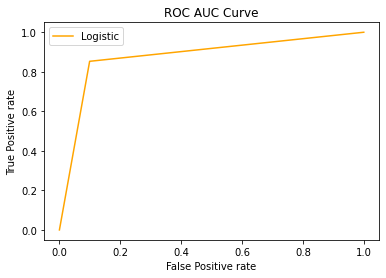

In [28]:
confusion_matrix5 = confusion_matrix(y_test,predictions5)
print("The confusion matrix is: \n", confusion_matrix5)
fpr,tpr,thresholds = roc_curve(y_test,predictions5)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc5 = roc_auc_score(y_test,predictions5)
print("The auc score is: ",roc_auc5.round(3))

accuracy5 = accuracy_score(y_test,predictions5)
print("The accuracy score is: ", accuracy5.round(3))

recall5 = recall_score(y_test,predictions5)
print("The recall score is: ", recall5.round(3))

precision5 = precision_score(y_test,predictions5)
print("The precision score is: ", precision5.round(3))

f1_score5 = f1_score(y_test,predictions5)
print("F1 score is: ", f1_score5.round(3))

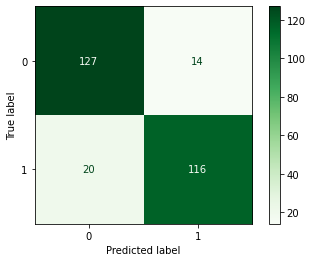

In [29]:
from sklearn import metrics
metrics.plot_confusion_matrix(model5,X_test,y_test,cmap='Greens')
plt.grid(False)

##### + Build Random Forest Model with hyperparameter : RandomizedSearchCV

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [31]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [32]:
model6 = RandomForestClassifier()

In [33]:
from sklearn.model_selection import RandomizedSearchCV

model6 = RandomizedSearchCV(estimator = model6, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [34]:
model6.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [35]:
model6.best_score_

0.8273364164801068

In [36]:
model6.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [37]:
print (f'Train Accuracy - : {model6.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model6.score(X_test,y_test):.3f}')

Train Accuracy - : 0.856
Test Accuracy - : 0.819


In [38]:
prediction6 = model6.predict(X_test)
 
# print classification report
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       141
           1       0.80      0.85      0.82       136

    accuracy                           0.82       277
   macro avg       0.82      0.82      0.82       277
weighted avg       0.82      0.82      0.82       277



Text(0, 0.5, 'Feature Importance Score')

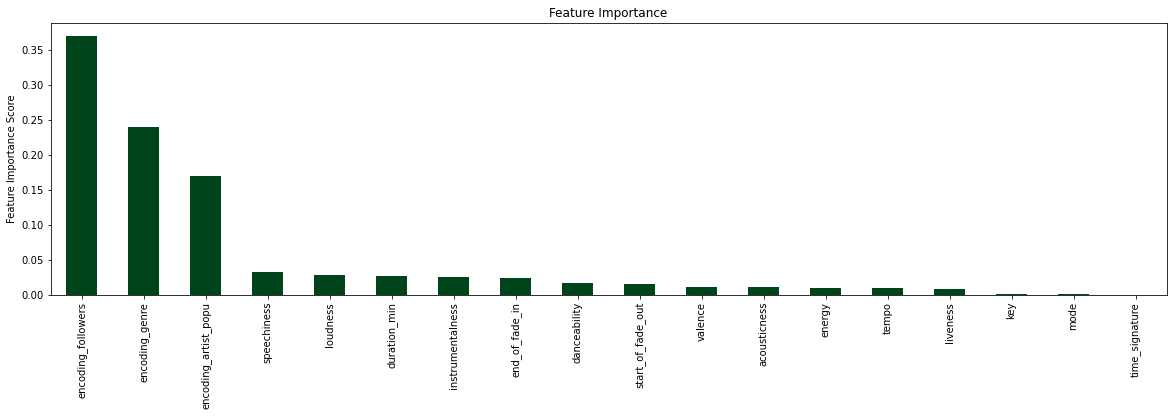

In [39]:
#Feature importance 
predictors = [x for x in X_train.columns]
feat_imp = pd.Series(model6.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:18]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance', cmap="Greens_r")
plt.ylabel('Feature Importance Score')

The confusion matrix is: 
 [[127  14]
 [ 20 116]]
The auc score is:  0.82
The accuracy score is:  0.819
The recall score is:  0.846
The precision score is:  0.799
F1 score is:  0.821


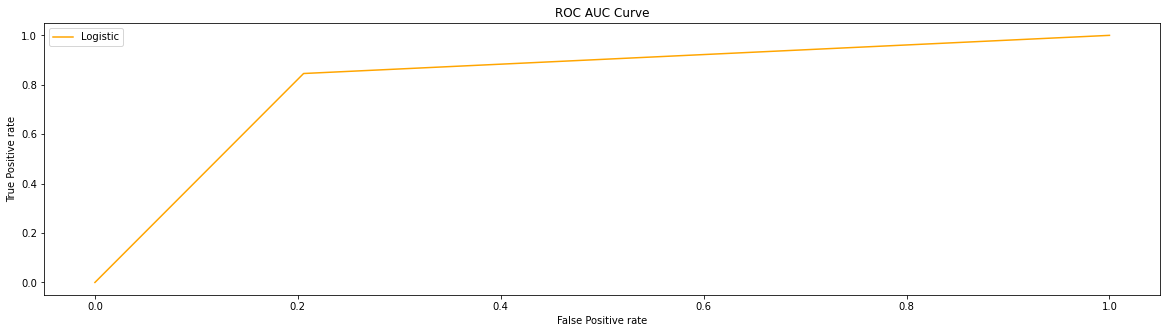

In [40]:
# Metrics for Model 6

confusion_matrix6 = confusion_matrix(y_test,prediction6)
print("The confusion matrix is: \n", confusion_matrix5)
fpr,tpr,thresholds = roc_curve(y_test,prediction6)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc6 = roc_auc_score(y_test,prediction6)
print("The auc score is: ",roc_auc6.round(3))

accuracy6 = accuracy_score(y_test,prediction6)
print("The accuracy score is: ", accuracy6.round(3))

recall6 = recall_score(y_test,prediction6)
print("The recall score is: ", recall6.round(3))

precision6 = precision_score(y_test,prediction6)
print("The precision score is: ", precision6.round(3))

f1_score6 = f1_score(y_test,prediction6)
print("F1 score is: ", f1_score6.round(3))

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model7 = DecisionTreeClassifier(class_weight='balanced').fit(X_train, y_train)
predictions7 = model7.predict(X_test)

In [43]:
print('Training accuracy {:.4f}'.format(model7.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model7.score(X_test,y_test)))

Training accuracy 0.9982
Testing accuracy 0.8014


The confusion matrix is: 
 [[117  24]
 [ 31 105]]
The auc score is:  0.801
The accuracy score is:  0.801
The recall score is:  0.772
The precision score is:  0.814
F1 score is:  0.792


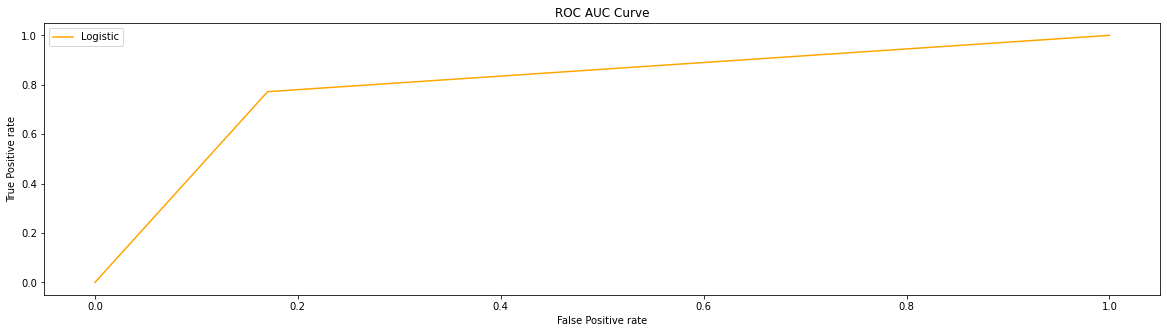

In [44]:
# Metrics for Model 7

confusion_matrix7 = confusion_matrix(y_test,predictions7)
print("The confusion matrix is: \n", confusion_matrix7)
fpr,tpr,thresholds = roc_curve(y_test,predictions7)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc7 = roc_auc_score(y_test,predictions7)
print("The auc score is: ",roc_auc7.round(3))

accuracy7 = accuracy_score(y_test,predictions7)
print("The accuracy score is: ", accuracy7.round(3))

recall7 = recall_score(y_test,predictions7)
print("The recall score is: ", recall7.round(3))

precision7 = precision_score(y_test,predictions7)
print("The precision score is: ", precision7.round(3))

f1_score7 = f1_score(y_test,predictions7)
print("F1 score is: ", f1_score7.round(3))

#### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
model8 = GaussianNB().fit(X_train, y_train)
predictions8 = model8.predict(X_test)

In [47]:
print('Training accuracy {:.4f}'.format(model8.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model8.score(X_test,y_test)))

Training accuracy 0.5488
Testing accuracy 0.5560


The confusion matrix is: 
 [[134   7]
 [116  20]]
The auc score is:  0.549
The accuracy score is:  0.556
The recall score is:  0.147
The precision score is:  0.741
F1 score is:  0.245


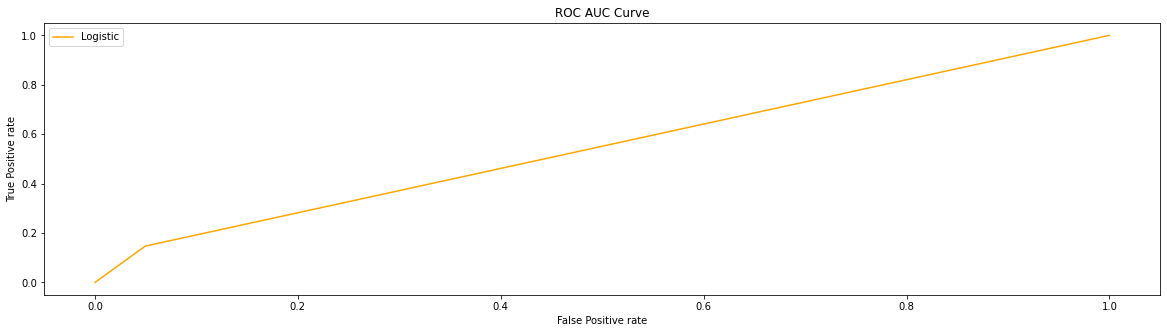

In [48]:
# Metrics for Model 8

confusion_matrix8 = confusion_matrix(y_test,predictions8)
print("The confusion matrix is: \n", confusion_matrix8)
fpr,tpr,thresholds = roc_curve(y_test,predictions8)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc8 = roc_auc_score(y_test,predictions8)
print("The auc score is: ",roc_auc8.round(3))

accuracy8 = accuracy_score(y_test,predictions8)
print("The accuracy score is: ", accuracy8.round(3))

recall8 = recall_score(y_test,predictions8)
print("The recall score is: ", recall8.round(3))

precision8 = precision_score(y_test,predictions8)
print("The precision score is: ", precision8.round(3))

f1_score8 = f1_score(y_test,predictions8)
print("F1 score is: ", f1_score8.round(3))

### Gradient Boosting algorithms

#### Catboost

In [49]:
#pip install catboost

In [50]:
from catboost import CatBoostClassifier

In [51]:
model9 = CatBoostClassifier().fit(X_train, y_train)
predictions9 = model9.predict(X_test)

Learning rate set to 0.010755
0:	learn: 0.6847896	total: 54.2ms	remaining: 54.1s
1:	learn: 0.6792116	total: 55.2ms	remaining: 27.6s
2:	learn: 0.6710554	total: 56.3ms	remaining: 18.7s
3:	learn: 0.6632904	total: 57.2ms	remaining: 14.2s
4:	learn: 0.6580940	total: 58.2ms	remaining: 11.6s
5:	learn: 0.6524892	total: 59.4ms	remaining: 9.85s
6:	learn: 0.6479169	total: 60.5ms	remaining: 8.58s
7:	learn: 0.6422384	total: 61.5ms	remaining: 7.63s
8:	learn: 0.6351289	total: 62.6ms	remaining: 6.89s
9:	learn: 0.6287133	total: 63.6ms	remaining: 6.3s
10:	learn: 0.6232408	total: 64.6ms	remaining: 5.81s
11:	learn: 0.6185323	total: 65.6ms	remaining: 5.4s
12:	learn: 0.6125521	total: 66.5ms	remaining: 5.05s
13:	learn: 0.6059276	total: 67.5ms	remaining: 4.75s
14:	learn: 0.6005471	total: 68.6ms	remaining: 4.5s
15:	learn: 0.5950458	total: 69.7ms	remaining: 4.29s
16:	learn: 0.5898154	total: 70.9ms	remaining: 4.1s
17:	learn: 0.5852886	total: 72ms	remaining: 3.93s
18:	learn: 0.5814864	total: 72.9ms	remaining: 3.76

In [52]:
print('Training accuracy {:.4f}'.format(model9.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model9.score(X_test,y_test)))

Training accuracy 0.9864
Testing accuracy 0.8917


The confusion matrix is: 
 [[132   9]
 [ 21 115]]
The auc score is:  0.891
The accuracy score is:  0.892
The recall score is:  0.846
The precision score is:  0.927
F1 score is:  0.885


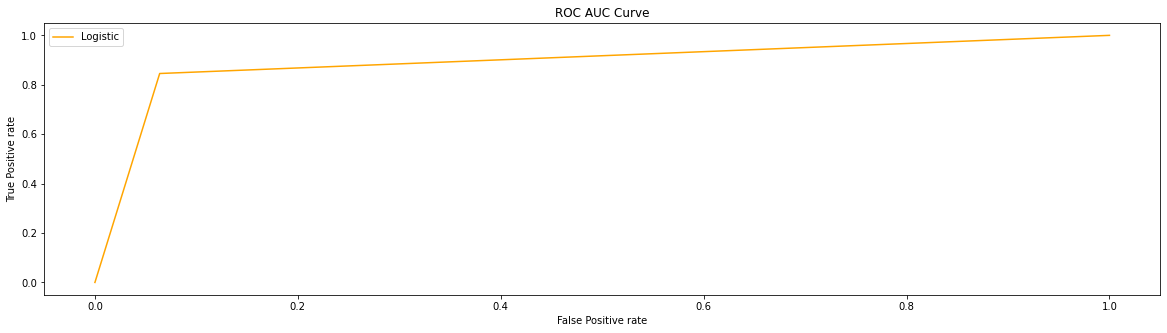

In [53]:
confusion_matrix9 = confusion_matrix(y_test,predictions9)
print("The confusion matrix is: \n", confusion_matrix9)
fpr,tpr,thresholds = roc_curve(y_test,predictions9)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend( )

roc_auc9 = roc_auc_score(y_test,predictions9)
print("The auc score is: ",roc_auc9.round(3))

accuracy9 = accuracy_score(y_test,predictions9)
print("The accuracy score is: ", accuracy9.round(3))

recall9 = recall_score(y_test,predictions9)
print("The recall score is: ", recall9.round(3))

precision9 = precision_score(y_test,predictions9)
print("The precision score is: ", precision9.round(3))

f1_score9 = f1_score(y_test,predictions9)
print("F1 score is: ", f1_score9.round(3))

#### LightGBM

In [54]:
#pip install lightgbm

In [55]:
import lightgbm as lgb

In [56]:
music_model['encoding_followers'] = music_model['encoding_followers'].apply(pd.to_numeric)

In [57]:
model10 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model10.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],eval_metric='logloss')

[1]	training's binary_logloss: 0.640999	valid_0's binary_logloss: 0.651324
[2]	training's binary_logloss: 0.597262	valid_0's binary_logloss: 0.616495
[3]	training's binary_logloss: 0.559526	valid_0's binary_logloss: 0.585367
[4]	training's binary_logloss: 0.526233	valid_0's binary_logloss: 0.556815
[5]	training's binary_logloss: 0.497464	valid_0's binary_logloss: 0.533256
[6]	training's binary_logloss: 0.471013	valid_0's binary_logloss: 0.511758
[7]	training's binary_logloss: 0.44843	valid_0's binary_logloss: 0.494549
[8]	training's binary_logloss: 0.427428	valid_0's binary_logloss: 0.478593
[9]	training's binary_logloss: 0.40821	valid_0's binary_logloss: 0.464398
[10]	training's binary_logloss: 0.390442	valid_0's binary_logloss: 0.452414
[11]	training's binary_logloss: 0.374897	valid_0's binary_logloss: 0.440814
[12]	training's binary_logloss: 0.358419	valid_0's binary_logloss: 0.430672
[13]	training's binary_logloss: 0.345539	valid_0's binary_logloss: 0.421078
[14]	training's binary_

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [58]:
print('Training accuracy {:.4f}'.format(model10.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model10.score(X_test,y_test)))

Training accuracy 0.9973
Testing accuracy 0.8989


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

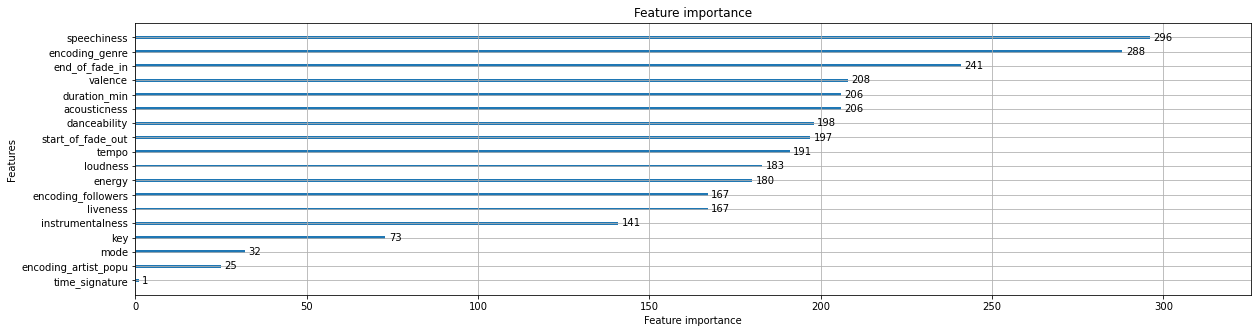

In [59]:
lgb.plot_importance(model10)

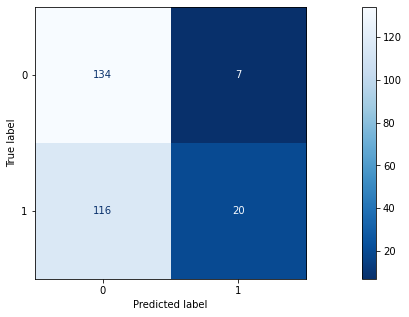

In [60]:
from sklearn import metrics
metrics.plot_confusion_matrix(model8,X_test,y_test,cmap='Blues_r')
plt.grid(False)

In [61]:
predictions10 = model10.predict(X_test)

In [62]:
print(metrics.classification_report(y_test,predictions10))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       141
           1       0.93      0.86      0.89       136

    accuracy                           0.90       277
   macro avg       0.90      0.90      0.90       277
weighted avg       0.90      0.90      0.90       277



The confusion matrix is: 
 [[132   9]
 [ 19 117]]
The auc score is:  0.898
The accuracy score is:  0.899
The recall score is:  0.86
The precision score is:  0.929
F1 score is:  0.893


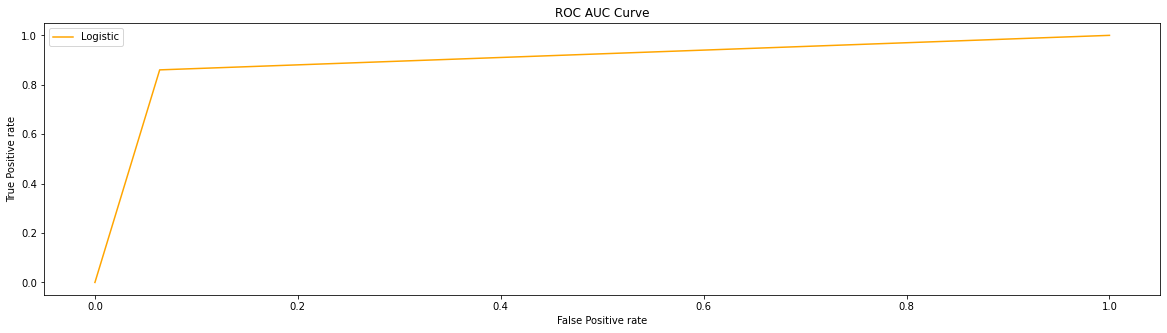

In [63]:
# Metrics for Model 10
confusion_matrix10 = confusion_matrix(y_test,predictions10)
print("The confusion matrix is: \n", confusion_matrix10)
fpr,tpr,thresholds = roc_curve(y_test,predictions10)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc10 = roc_auc_score(y_test,predictions10)
print("The auc score is: ",roc_auc10.round(3))

accuracy10 = accuracy_score(y_test,predictions10)
print("The accuracy score is: ", accuracy10.round(3))

recall10 = recall_score(y_test,predictions10)
print("The recall score is: ", recall10.round(3))

precision10 = precision_score(y_test,predictions10)
print("The precision score is: ", precision10.round(3))

f1_score10 = f1_score(y_test,predictions10)
print("F1 score is: ", f1_score10.round(3))

##### + Build LightGBM Model with hyperparameter : RandomizedSearchCV

In [64]:
#grid of parameters
gridParams = {
    'learning_rate': [0.01,0.05,0.1],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'metric':['accuracy']
    }

In [65]:
#modelling
clf = lgb.LGBMRegressor()
model11 = RandomizedSearchCV(clf,gridParams,verbose=1,cv=3,n_jobs = -1,n_iter=10)
model11.fit(X_train,y_train)

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_featu

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [5, 6, 7, 8],
                                        'metric': ['accuracy'],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   verbose=1)

In [66]:
model11.best_score_

0.5834835338276505

In [67]:
#best parameters
model11.best_params_

{'subsample': 0.5,
 'random_state': 501,
 'objective': 'binary',
 'num_leaves': 90,
 'min_split_gain': 0.01,
 'metric': 'accuracy',
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7,
 'boosting_type': 'gbdt'}

In [68]:
#Prediction
prediction11 = model11.predict(X_test)

Text(0, 0.5, 'Feature Importance Score')

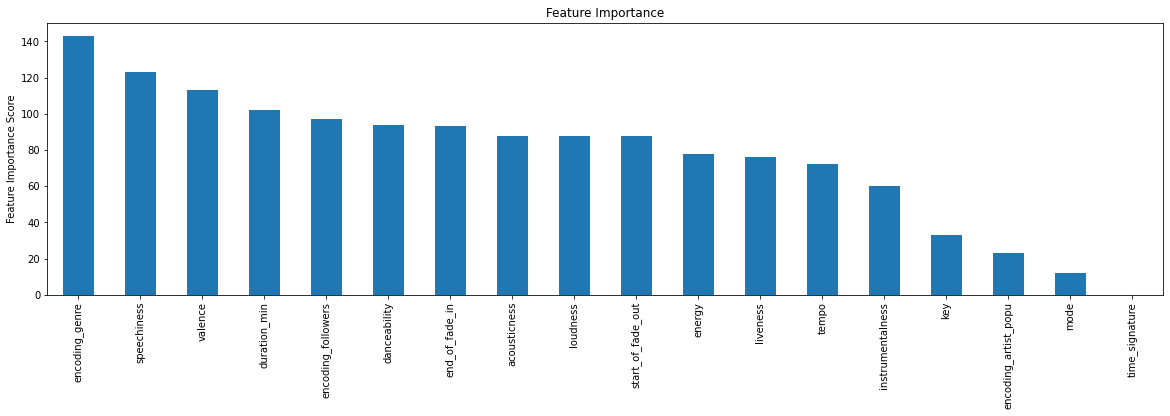

In [69]:
#Feature importance
predictors = [x for x in X_train.columns]
feat_imp = pd.Series(model11.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

In [70]:
print(classification_report(y_test, np.round(abs(prediction11))))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       141
           1       0.91      0.85      0.87       136

    accuracy                           0.88       277
   macro avg       0.88      0.88      0.88       277
weighted avg       0.88      0.88      0.88       277



In [71]:
# print classification report
print(accuracy_score(y_test, np.round(abs(prediction11))))

0.8808664259927798


In [72]:
print(precision_score(y_test, np.round(abs(prediction11))))

0.905511811023622


The confusion matrix is: 
 [[129  12]
 [ 21 115]]
The auc score is:  0.88
The accuracy score is:  0.881
The recall score is:  0.846
The precision score is:  0.906
F1 score is:  0.875


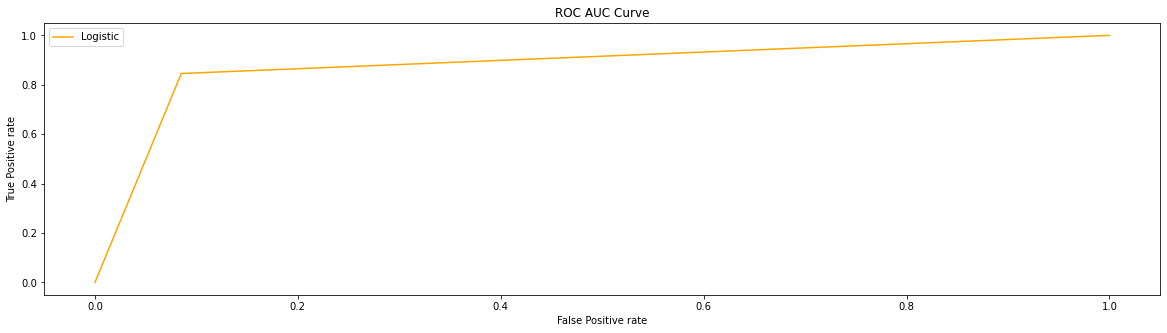

In [73]:
confusion_matrix4 = confusion_matrix(y_test,np.round(abs(prediction11)))
print("The confusion matrix is: \n", confusion_matrix4)
fpr,tpr,thresholds = roc_curve(y_test,np.round(abs(prediction11)))
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend( )

roc_auc11 = roc_auc_score(y_test,np.round(abs(prediction11)))
print("The auc score is: ",roc_auc11.round(3))

accuracy11 = accuracy_score(y_test,np.round(abs(prediction11)))
print("The accuracy score is: ", accuracy11.round(3))

recall11 = recall_score(y_test,np.round(abs(prediction11)))
print("The recall score is: ", recall11.round(3))

precision11 = precision_score(y_test,np.round(abs(prediction11)))
print("The precision score is: ", precision11.round(3))

f1_score11 = f1_score(y_test,np.round(abs(prediction11)))
print("F1 score is: ", f1_score11.round(3))

#### XGBoost

In [74]:
#pip install xgboost

In [75]:
from xgboost import XGBClassifier, plot_importance

In [76]:
model12 = XGBClassifier(objective='binary:logistic',n_estimators=15, use_label_encoder=False)
model12.fit(X_train, y_train, eval_metric=['auc','error','logloss'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [77]:
print('Training accuracy {:.4f}'.format(model12.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model12.score(X_test,y_test)))

Training accuracy 0.9792
Testing accuracy 0.8736


In [78]:
predictions12 = model12.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

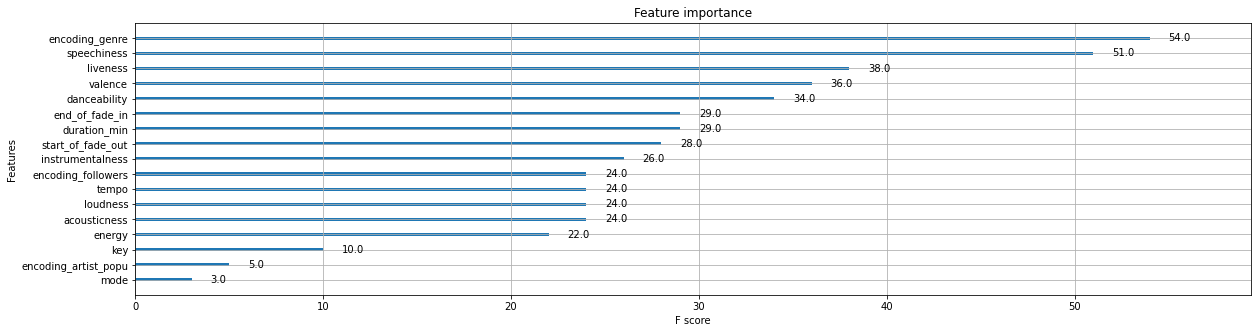

In [79]:
plot_importance(model12)

The confusion matrix is: 
 [[128  13]
 [ 22 114]]
The auc score is:  0.873
The accuracy score is:  0.874
The recall score is:  0.838
The precision score is:  0.898
F1 score is:  0.867


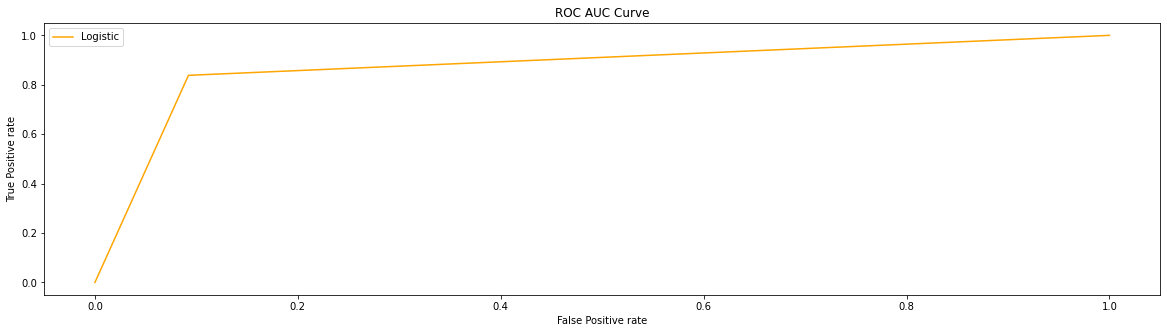

In [80]:
# Metrics for Model 12
confusion_matrix12 = confusion_matrix(y_test,predictions12)
print("The confusion matrix is: \n", confusion_matrix12)
fpr,tpr,thresholds = roc_curve(y_test,predictions12)
plt.plot(fpr,tpr, label='Logistic', color="orange")
plt.title('ROC AUC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()

roc_auc12 = roc_auc_score(y_test,predictions12)
print("The auc score is: ",roc_auc12.round(3))

accuracy12 = accuracy_score(y_test,predictions12)
print("The accuracy score is: ", accuracy12.round(3))

recall12 = recall_score(y_test,predictions12)
print("The recall score is: ", recall12.round(3))

precision12 = precision_score(y_test,predictions12)
print("The precision score is: ", precision12.round(3))

f1_score12 = f1_score(y_test,predictions12)
print("F1 score is: ", f1_score12.round(3))

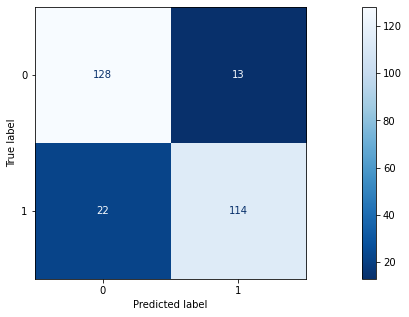

In [81]:
metrics.plot_confusion_matrix(model12,X_test,y_test,cmap='Blues_r')
plt.grid(False)

#### Récapitulatif des métriques des modèles

In [82]:
pd.DataFrame({
    "Model": ['Régression Logistique', 'Linear SVC', 'SVM w/ GridSearchCV', 'kNN', 'Random Forest',
             'Random Forest w/ RandomizedSearchCV', 'Decision Tree', 'Naive Bayes', 'Catboost',
             'LightGBM', 'LightGBM w/ RandomizedSearchCV', 'XGBoost'],
    "Roc Auc": [eval(f'roc_auc{i}') for i in range(1,13)],
    "Accuracy": [eval(f'accuracy{i}') for i in range(1,13)],
    "Recall": [eval(f'recall{i}') for i in range(1,13)],
    "Precision": [eval(f'precision{i}') for i in range(1,13)],
    "F1 score": [eval(f'f1_score{i}') for i in range(1,13)],
}).round(3)

,Model,Roc Auc,Accuracy,Recall,Precision,F1 score
0,Régression Logistique,0.722,0.722,0.746,0.710,0.728
1,Linear SVC,0.740,0.740,0.768,0.726,0.746
2,SVM w/ GridSearchCV,0.787,0.787,0.790,0.784,0.787
3,kNN,0.772,0.773,0.725,0.800,0.760
4,Random Forest,0.877,0.877,0.853,0.892,0.872
5,Random Forest w/ RandomizedSearchCV,0.820,0.819,0.846,0.799,0.821
6,Decision Tree,0.801,0.801,0.772,0.814,0.792
7,Naive Bayes,0.549,0.556,0.147,0.741,0.245
8,Catboost,0.891,0.892,0.846,0.927,0.885
9,LightGBM,0.898,0.899,0.860,0.929,0.893


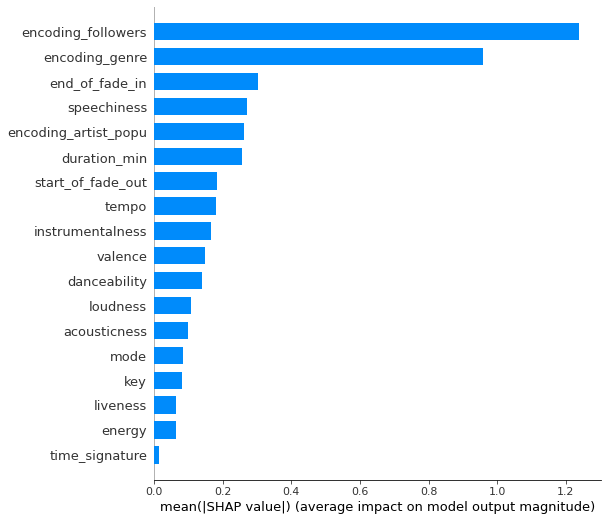

In [83]:
import shap

shap_values = shap.TreeExplainer(model9).shap_values(X_test, y_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [84]:
explainer = shap.KernelExplainer(model9.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

Using 1106 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, InlineExplainer

explainer2 = ClassifierExplainer(model9, X_test, y_test)
InlineExplainer(explainer2).shap.overview()


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


Note: model_output=='probability'. For CatBoostClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Calculating shap values...


In [ ]:
ExplainerDashboard(explainer2, mode="external").run()

### Kmeans

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

km = KMeans(n_clusters=2)
km.fit(X_std) # data scaler
clustersk = km.labels_

data_clusterk = pd.DataFrame({'clusters_kmeans' : clustersk})
data = music_model.join(data_clusterk)
illustrative_var = music_model['is_certified_single']

In [ ]:
# Moyennes des dimensions pour les 2 clusters
data.groupby('clusters_kmeans').mean().drop("is_certified_single",axis=1)

In [ ]:
# Moyennes des dimensions pour les 2 clusters (k-means)
data.groupby('is_certified_single').mean().drop("clusters_kmeans",axis=1)

In [ ]:
# Matrice de confusion
df_confusion = pd.crosstab(data.is_certified_single,data.clusters_kmeans)
df_confusion

In [ ]:
# Représentation graphique de la matrice de confusion : heat map
sns.heatmap(df_confusion, annot=True, fmt='g')

plt.title("Matrice de confusion", size=15)
plt.show()

### Dimensionality Reduction Algorithms

#### ACP

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(2)
pca.fit(X_train_std) # use scaler data
X_PCA = pca.transform(X_train_std)

In [ ]:
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y_train, cmap="copper")
plt.title('PCA components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component') 

#### Nonlinear Dimensionality Reduction Algorithm : TSNE

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

tsne = model.fit_transform(X_train_std)
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_train, cmap='tab20b')

plt.show()

In [ ]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(X_PCA[:,0],X_PCA[:,1], c= y_train,
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne[:,0],tsne[:,1], c= y_train,
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

### Multilabel - catégories certification

#### Certification singles

In [ ]:
# Variables explicatives
X = music_model[['acousticness', 'danceability', 'duration_min', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'end_of_fade_in',
       'start_of_fade_out', 'encoding_genre', 'encoding_followers','encoding_artist_popu']]

# Variable à expliquer
y = music_model.certif_single

In [ ]:
# Partition aléatoire du jeu de données en 80% pour créer le modèle, 20% pour tester le modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
categories = ['Or','Platine','Diamant','Aucune']

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(RandomForestClassifier())

for category in categories:
    print('Processing {} category :'.format(category))
    
    clf.fit(X_train, y_train)
    
    prediction = clf.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
    print("\n")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Or','Platine','Diamant','Aucune']))

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, prediction, average=None)